In [1]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [2]:
import polars as pl
import numpy as np
from datetime import date
import silverfund.data_access_layer as dal
from silverfund.enums import Interval
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
start_date = date(1996, 1, 1)
end_date = date(2023, 12, 31)
interval = Interval.MONTHLY

In [4]:
universe = dal.load_universe(interval=interval, start_date=start_date, end_date=end_date)

training_data = universe.join(
        dal.load_barra_returns(interval=interval, start_date=start_date, end_date=end_date),
        on=["date", "barrid"],
        how="left",
).sort(["barrid", "date"])

training_data

Loading Barra Returns: 100%|██████████| 28/28 [00:05<00:00,  5.07it/s]


date,barrid,currency,mktcap,price,logret,ret
date,str,str,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314
…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933


In [5]:
barra_total_risk = dal.load_total_risk(
    interval=interval, start_date=start_date, end_date=end_date, quiet=False
)

barra_total_risk

Loading Barra Total Risk:   0%|          | 0/28 [00:00<?, ?it/s]

Loading Barra Total Risk: 100%|██████████| 28/28 [00:04<00:00,  5.68it/s]


date,barrid,div_yield,histbeta,predbeta,spec_risk,total_risk
date,str,f64,f64,f64,f64,f64
1996-01-31,"""AUSBYA1""",0.043127,-0.037665,0.288802,0.140726,0.1833
1996-01-31,"""CANAMH1""",0.0,0.637434,0.917042,0.360302,0.413814
1996-01-31,"""CANASK1""",0.0,0.574092,1.862454,0.945387,0.980487
1996-01-31,"""CANAUD1""",0.047458,0.00016,0.797736,0.13528,0.193173
1996-01-31,"""CANAUS1""",null,0.00016,0.049291,0.25631,0.358115
…,…,…,…,…,…,…
2023-12-29,"""USBPPH1""",null,1.078032,0.95078,0.181427,0.308507
2023-12-29,"""USBPPS1""",null,0.805638,0.983537,0.289836,0.407579
2023-12-29,"""USBPQA1""",null,1.241031,1.592499,0.728063,0.821866


In [6]:
df = training_data.join(
    barra_total_risk.select(["date", "barrid", "predbeta", "spec_risk"]),  # Select only relevant columns
    on=["date", "barrid"],
    how="left"
)

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk
date,str,str,f64,f64,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289,0.7106818
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204,0.169787
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352,0.174264
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349,0.550569
…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069


In [ ]:
df = df.drop_nulls(subset=["predbeta"])

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk
date,str,str,f64,f64,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289,0.7106818
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204,0.169787
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352,0.174264
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349,0.550569
…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069


In [25]:
# Create portfolio bins

labels = [str(x) for x in range(10)]

df = df.with_columns(pl.col("predbeta").qcut(10, labels=labels).over("date").alias("bin"))

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk,bin
date,str,str,f64,f64,f64,f64,f64,f64,cat
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289,0.7106818,"""5"""
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204,0.169787,"""0"""
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352,0.174264,"""0"""
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869,"""0"""
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349,0.550569,"""0"""
…,…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526,"""7"""
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994,"""8"""
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069,"""6"""


In [26]:
# Create portfolio returns dataframe

# Aggregate (equal weight portfolios)
port = df.group_by(["date", "bin"]).agg(pl.col("ret").mean())

# Pivot
port = port.pivot(on="bin", index="date", values="ret")

# Reorder columns
port = port.select(["date"] + labels)

# Sort
port = port.sort(by="date")

port

date,0,1,2,3,4,5,6,7,8,9
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1996-01-31,0.007605,0.015284,0.009473,0.008752,0.011847,0.012592,0.015176,0.013848,0.019808,-0.028428
1996-02-29,0.007362,0.014095,0.018355,0.03412,0.020475,0.031176,0.033025,0.039213,0.043246,0.051707
1996-03-29,0.008022,0.02132,0.031255,0.025533,0.031153,0.031689,0.047439,0.011954,0.018899,-0.005395
1996-04-30,0.00156,0.023299,0.024383,0.031308,0.048644,0.029178,0.054237,0.065734,0.075907,0.136326
1996-05-31,0.019196,0.020529,0.025725,0.031748,0.017534,0.025775,0.033253,0.044181,0.065718,0.044483
…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054


In [27]:
# Create spread portfolio

port = port.with_columns((pl.col("0") - pl.col("9")).alias("spread"))

port

date,0,1,2,3,4,5,6,7,8,9,spread
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1996-01-31,0.007605,0.015284,0.009473,0.008752,0.011847,0.012592,0.015176,0.013848,0.019808,-0.028428,0.036033
1996-02-29,0.007362,0.014095,0.018355,0.03412,0.020475,0.031176,0.033025,0.039213,0.043246,0.051707,-0.044345
1996-03-29,0.008022,0.02132,0.031255,0.025533,0.031153,0.031689,0.047439,0.011954,0.018899,-0.005395,0.013417
1996-04-30,0.00156,0.023299,0.024383,0.031308,0.048644,0.029178,0.054237,0.065734,0.075907,0.136326,-0.134765
1996-05-31,0.019196,0.020529,0.025725,0.031748,0.017534,0.025775,0.033253,0.044181,0.065718,0.044483,-0.025287
…,…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791,0.155731
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615,0.106142
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054,0.17313


In [28]:
# Unpivot dataframe
port = port.unpivot(index="date", variable_name="bin", value_name="ret")

# Sort
port = port.sort(by=["date", "bin"])

port

date,bin,ret
date,str,f64
1996-01-31,"""0""",0.007605
1996-01-31,"""1""",0.015284
1996-01-31,"""2""",0.009473
1996-01-31,"""3""",0.008752
1996-01-31,"""4""",0.011847
…,…,…
2023-12-29,"""6""",0.149087
2023-12-29,"""7""",0.183335
2023-12-29,"""8""",0.20513


In [29]:
# Calculate mean, std, sharpe, and tstat of each portfolio

# Mean, std, and count
result = port.group_by("bin").agg(
    [
        pl.col("ret").mean().cast(pl.Float64).alias("mean"),
        pl.col("ret").std().cast(pl.Float64).alias("std"),
        pl.col("ret").count().cast(pl.Float64).alias("count"),
    ]
)

# Sharpe
result = result.with_columns(
    ((pl.col("mean") * 12) / (pl.col("std") * np.sqrt(12)))
    .cast(pl.Float64)
    .alias("annualized_sharpe")
)

# Tstat
result = result.with_columns(
    (pl.col("mean") / (pl.col("std") / pl.col("count").sqrt())).cast(pl.Float64).alias("tstat")
)

# Sort
result = result.sort(by="bin")

# Transpose
result = result.transpose(include_header=True, column_names="bin", header_name="statistic")

print("Monthly results")
result

Monthly results


statistic,0,1,2,3,4,5,6,7,8,9,spread
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",0.012049,0.012381,0.012269,0.012329,0.012516,0.011287,0.00944,0.007448,0.004621,0.001577,0.010472
"""std""",0.028694,0.036226,0.041802,0.047332,0.053022,0.05917,0.06848,0.081779,0.103554,0.140288,0.130475
"""count""",336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0
"""annualized_sharpe""",1.454671,1.183975,1.016731,0.902359,0.817706,0.660784,0.47752,0.315501,0.154593,0.038947,0.278032
"""tstat""",7.697398,6.265005,5.380035,4.774837,4.326891,3.496539,2.526801,1.669476,0.818031,0.206089,1.471207


In [30]:
# Create backtest plot

# Log returns
port = port.with_columns(pl.col("ret").log1p().over("bin").alias("logret"))

# Cummulative sum log returns
port = port.with_columns(pl.col("logret").cum_sum().over("bin").alias("cumret") * 100)

port

date,bin,ret,logret,cumret
date,str,f64,f64,f64
1996-01-31,"""0""",0.007605,0.007576,0.757582
1996-01-31,"""1""",0.015284,0.015168,1.516818
1996-01-31,"""2""",0.009473,0.009428,0.942797
1996-01-31,"""3""",0.008752,0.008714,0.871374
1996-01-31,"""4""",0.011847,0.011778,1.177766
…,…,…,…,…
2023-12-29,"""6""",0.149087,0.138968,236.714962
2023-12-29,"""7""",0.183335,0.168337,136.527241
2023-12-29,"""8""",0.20513,0.186587,-26.199725


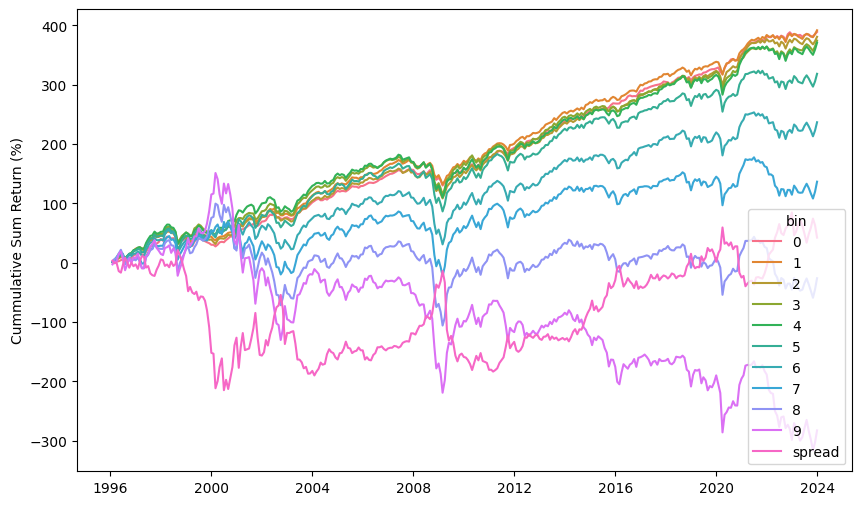

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(port, x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

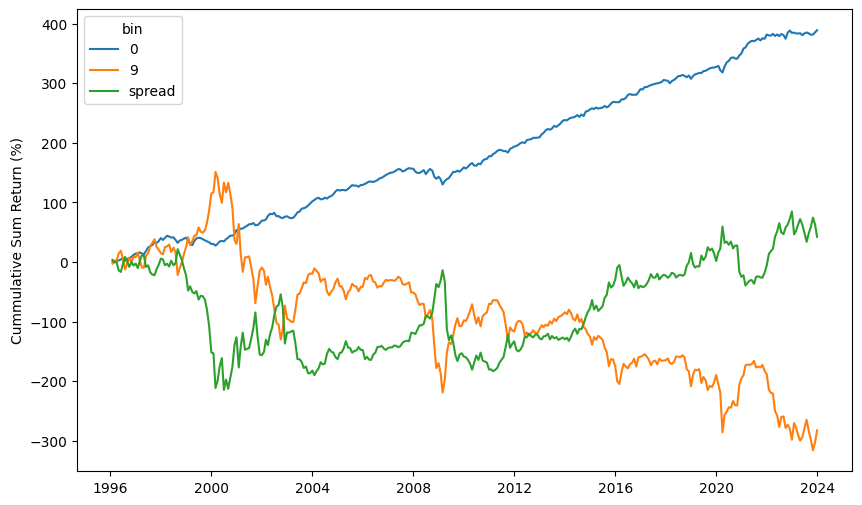

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    port.filter(pl.col("bin").is_in(["0", "9", "spread"])), x="date", y="cumret", hue="bin"
)
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

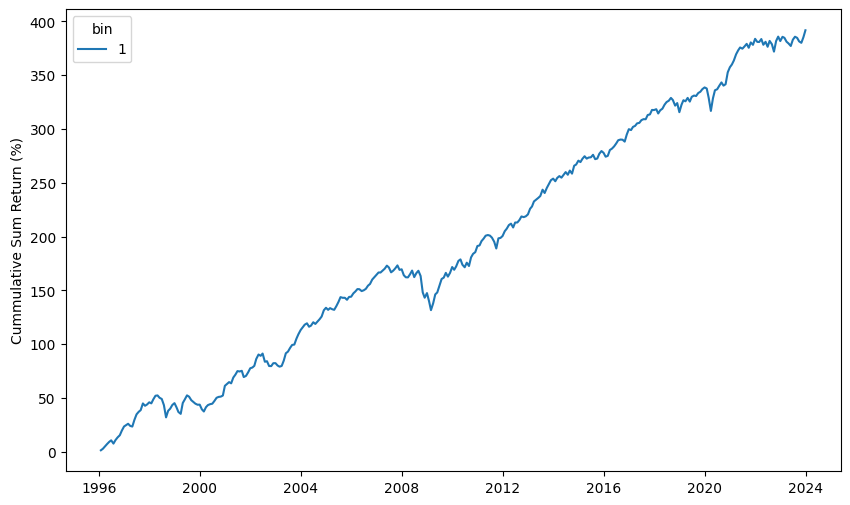

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(port.filter(pl.col("bin") == "1"), x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

In [34]:
spread = port.filter(pl.col("bin") == "0").sort("date")["ret"]

portfolio_er = spread.mean()
portfolio_vol = np.sqrt(spread.std())

portfolio_sharpe = (portfolio_er / portfolio_vol) * np.sqrt(252)

print(f"Portfolio sharpe: {portfolio_sharpe:.4f}")

Portfolio sharpe: 1.1292


<Axes: xlabel='predbeta', ylabel='Count'>

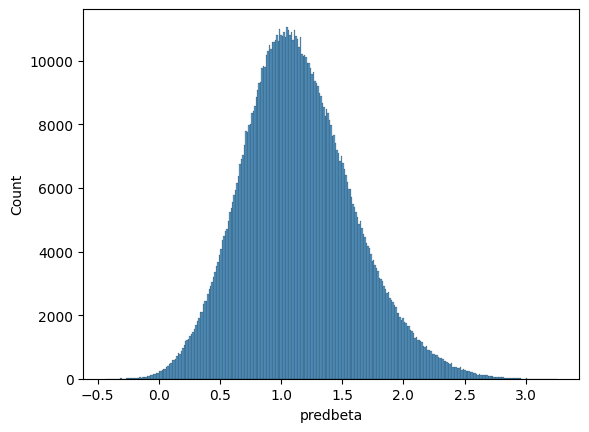

In [7]:
sns.histplot(df,x='predbeta')

In [8]:
df['predbeta'].mean()

1.1420058843590228

In [9]:
import polars as pl
from scipy.stats import norm
import numpy as np

# Assuming df is already defined with the provided data

def add_brandon_predbeta(df: pl.DataFrame) -> pl.DataFrame:
    """
    Adds a new column 'brandon_predbeta' to the DataFrame by:
    1. Ranking 'predbeta' within each date and scaling to [0, 1].
    2. Applying the inverse CDF (probit transformation) of the standard normal distribution
       to remove skewness.

    Args:
        df (pl.DataFrame): Input dataset with 'date', 'barrid', and 'predbeta' columns.

    Returns:
        pl.DataFrame: DataFrame with the new 'brandon_predbeta' column.
    """
    ranked_df = (
        df.sort(["date", "predbeta"])
        .with_columns(
            (
                (pl.col("predbeta").rank("average").over("date") - 1)
                / (pl.col("predbeta").count().over("date") - 1)
            ).alias("rank_scaled")
        )
    )

    transformed_df = ranked_df.with_columns(
        pl.col("rank_scaled").map_elements(lambda x: norm.ppf(np.clip(x, 1e-6, 1 - 1e-6)), return_dtype=pl.Float64).alias("brandon_predbeta")
    )

    return transformed_df

# Example usage:
transformed_df = add_brandon_predbeta(df)

<Axes: xlabel='brandon_predbeta', ylabel='Count'>

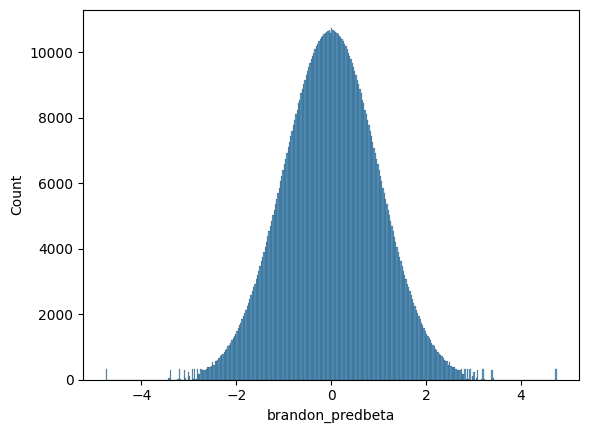

In [10]:
sns.histplot(transformed_df,x='brandon_predbeta')

In [11]:
transformed_df['brandon_predbeta'].mean()

2.326812998478857e-10

In [29]:
df1 = pl.read_parquet('/home/jaic007/src/sf-trading-system/research/bettingAgainstBeta/noSkewBarraBeta/zeroBeta/noSkew_ZB_backtest.parquet')

df1

date,barrid,weight,fwd_ret
date,str,f64,f64
2009-05-29,"""CAN17B1""",0.00665,-0.046411
2009-06-01,"""CAN17B1""",0.008029,0.064893
2009-06-02,"""CAN17B1""",0.00722,-0.039001
2009-06-03,"""CAN17B1""",0.00765,0.077996
2009-06-04,"""CAN17B1""",0.007622,-0.027647
…,…,…,…
2023-12-26,"""USBPKS1""",-0.003485,0.090373
2023-12-27,"""USBPKS1""",-0.00307,0.082883
2023-12-28,"""USBPKS1""",-0.002998,-0.014975


In [30]:
df_p = df.to_pandas()

df1_p = df1.to_pandas()

In [31]:
df_p

,date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk
0,2009-05-29,CAN17B1,CAD,1.109093e+09,16.16,-0.002316,-0.002313,1.280289,0.710682
1,2006-06-30,CAN1G71,CAD,5.543929e+09,28.68,-0.014538,-0.014433,0.690204,0.169787
2,2006-07-31,CAN1G71,CAD,5.447278e+09,28.18,-0.022110,-0.021867,0.689352,0.174264
3,2023-04-28,GERRJO1,EUR,7.595649e+08,18.00,-0.005540,-0.005524,0.593054,0.432869
4,2013-07-31,USA06Z1,USD,6.006157e+08,6.26,-0.120264,-0.113314,0.343490,0.550569
...,...,...,...,...,...,...,...,...,...
991838,2023-11-30,USBPJV1,USD,2.390520e+08,16.35,-0.150738,-0.139927,1.532600,0.603526
991839,2023-12-29,USBPJV1,USD,2.672458e+08,18.48,0.140255,0.150567,1.647418,0.666994
991840,2023-11-30,USBPKS1,USD,6.024414e+07,3.61,-3.726922,-0.975933,1.338263,0.883069
991841,2023-12-29,USBPKS1,USD,9.880322e+07,5.92,0.494629,0.639890,1.453334,0.859742


In [32]:
df1_p

,date,barrid,weight,fwd_ret
0,2009-05-29,CAN17B1,0.006650,-0.046411
1,2009-06-01,CAN17B1,0.008029,0.064893
2,2009-06-02,CAN17B1,0.007220,-0.039001
3,2009-06-03,CAN17B1,0.007650,0.077996
4,2009-06-04,CAN17B1,0.007622,-0.027647
...,...,...,...,...
20804113,2023-12-26,USBPKS1,-0.003485,0.090373
20804114,2023-12-27,USBPKS1,-0.003070,0.082883
20804115,2023-12-28,USBPKS1,-0.002998,-0.014975
20804116,2023-12-29,USBPKS1,-0.002198,NaN


In [33]:
df_merge = df1_p.merge(df_p, on=['date', 'barrid'])

In [34]:
df_merge

,date,barrid,weight,fwd_ret,currency,mktcap,price,logret,ret,predbeta,spec_risk
0,2009-05-29,CAN17B1,0.006650,-0.046411,CAD,1.109093e+09,16.16,-0.002316,-0.002313,1.280289,0.710682
1,2006-06-30,CAN1G71,-0.005838,0.000000,CAD,5.543929e+09,28.68,-0.014538,-0.014433,0.690204,0.169787
2,2006-07-31,CAN1G71,0.005886,-0.019872,CAD,5.447278e+09,28.18,-0.022110,-0.021867,0.689352,0.174264
3,2023-04-28,GERRJO1,0.058465,0.000000,EUR,7.595649e+08,18.00,-0.005540,-0.005524,0.593054,0.432869
4,2013-07-31,USA06Z1,0.079472,0.009585,USD,6.006157e+08,6.26,-0.120264,-0.113314,0.343490,0.550569
...,...,...,...,...,...,...,...,...,...,...,...
991807,2023-11-30,USBPJV1,-0.013323,0.146177,USD,2.390520e+08,16.35,-0.150738,-0.139927,1.532600,0.603526
991808,2023-12-29,USBPJV1,-0.015622,NaN,USD,2.672458e+08,18.48,0.140255,0.150567,1.647418,0.666994
991809,2023-11-30,USBPKS1,-0.002139,0.013850,USD,6.024414e+07,3.61,-3.726922,-0.975933,1.338263,0.883069
991810,2023-12-29,USBPKS1,-0.002198,NaN,USD,9.880322e+07,5.92,0.494629,0.639890,1.453334,0.859742


In [35]:
df_merge['beta_weight'] = df_merge['weight'] * df_merge['predbeta']

df_merge.groupby('date')['beta_weight'].sum()

date
1996-01-31   -4.943095e-15
1996-02-29    8.881784e-16
1996-03-29   -3.810320e-15
1996-04-30    1.579032e-15
1996-05-31    5.806119e-15
                  ...     
2023-08-31    1.451270e-14
2023-09-29   -3.750472e-15
2023-10-31    1.693090e-14
2023-11-30   -2.781195e-15
2023-12-29   -1.060263e-14
Name: beta_weight, Length: 336, dtype: float64

GAMMA UP OR IC DOWN - same thing 

check if binding by checking lagrange multiplier (cvxpy) [if 0, not binding - else binding] 

check risk 